# Visualização da Distribuição das Partículas no Solo

Para começar, é necessário que o ROOT esteja instalado na sua máquina. Recomendo consultar o site [https://root.cern/install/dependencies/](https://root.cern/install/dependencies/) para verificar as dependências necessárias.

Além disso, certifique-se de ter os pacotes importados listados abaixo e de verificar o caminho para o diretório do COAST. Para isso, basta confirmar se a pasta COAST está dentro do diretório do CORSIKA e copiar o caminho correspondente.

O documento abaixo consiste em duas partes: na primeira, lemos o arquivo binário `DATnnnnn` gerado após a execução do CORSIKA. A partir desse arquivo, criamos um arquivo `.csv` contendo os dados de posição e tipo de partícula no nível do observador.

A segunda parte é responsável por visualizar graficamente essa distribuição de partículas no solo, utilizando o arquivo gerado anteriormente.

Essa é apenas uma abordagem simplificada para visualizar esse tipo de dado. Todos os créditos são dados a Pierpaolo Savina, que disponibilizou o diretório de onde extraí o arquivo C++ que modifiquei para obter os dados. Você pode acessar mais informações através dos seguintes links: [apresentação](https://indico.nucleares.unam.mx/event/1396/session/14/contribution/47/material/slides/0.pdf) e [projeto no GitLab](https://gitlab.com/psavina_public_projects/corsika-hands_on).

Novamente, sugestões são sempre bem-vindas, e estou à disposição para recebê-las.

Marcos V. T. Olegario   
marcos.olegario@usp.br  

25/out/2024

In [1]:
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Primeira parte: obter arquivo com distribuição de partículas no solo a partir do arquivo binário `DATnnnnn`

In [2]:
# Diretório do coast:
coast_path = '/home/marcos/Documents/corsika/corsika-77550'

In [3]:
# Adicionando o diretório do coast ao arquivo Makefile:
with open('Makefile', 'r') as file:
    lines = file.readlines()
lines[4] = 'export COAST_DIR='+coast_path+'\n'
with open('Makefile', 'w') as file:
    file.writelines(lines)

In [4]:
try:
    subprocess.run(['make'], check=True)
    print("Makefile executado com sucesso.")
except subprocess.CalledProcessError as e:
    print(f"Ocorreu um erro ao executar o Makefile: {e}")

make: Nada a ser feito para 'all'.
Makefile executado com sucesso.


### Abrindo arquivo binário e salvando os dados das partículas que atingem o solo

In [19]:
# Arquivo DATnnnnn
inp = 'input/DAT000002'

# Arquivo (planílha) de saída com os dados
out = 'output/saida.csv'

# Número de chuveiros para analisar:
n = 1

try:
    subprocess.run('./footprint -n {} {} -o {}'.format(n, inp, out), shell=True, check=True)
    print("Comando executado com sucesso.")
except subprocess.CalledProcessError as e:
    print(f"Ocorreu um erro ao executar o comando: {e}")

 reading CORSIKA file: "input/DAT000002"
-----------------------------
plot of the shower nr: 1
shower obs level: 1452 m
-----------------------------
Comando executado com sucesso.


## Segunda parte: Visualizando a distribuição de partículas no solo

In [20]:
data = pd.read_csv(out)
print("Primeiras 5 linhas:\n", data.head())

frequencias = data['Type'].value_counts()
print("\nFrequência de cada partícula:\n", frequencias)

Primeiras 5 linhas:
           X        Y   Type
0  -10.0687  76.8006   muon
1  -10.0687  76.8006  total
2   54.5516 -16.3384   muon
3   54.5516 -16.3384  total
4 -459.2520  19.9921   muon

Frequência de cada partícula:
 Type
total       633
muon        615
electron     16
nucleus       2
Name: count, dtype: int64


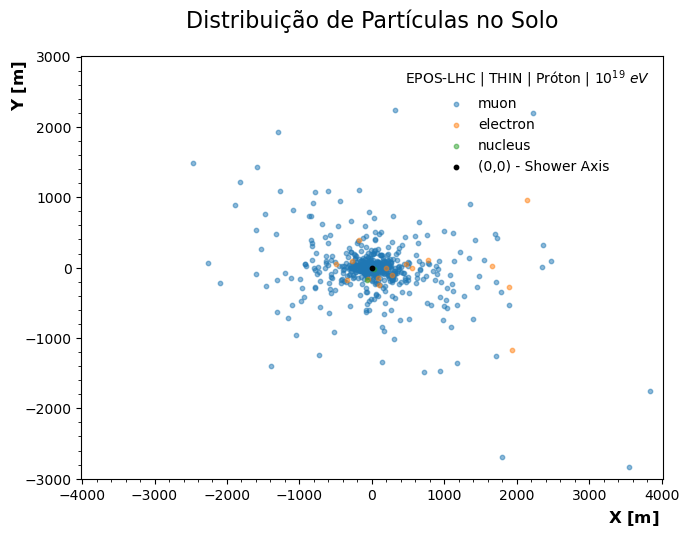

In [23]:
fig, ax = plt.subplots(figsize=(7.5, 5.5))

for i in data['Type'].unique():
    if i != 'total':
        particle = data[data['Type'] == i]
        ax.scatter(particle['X'], particle['Y'], label=i, alpha=0.5, s=10)

plt.scatter(0, 0, color='k', label='(0,0) - Shower Axis', alpha=1, s=10)

ax.set_xlabel(r"$\mathbf{X \ [m]}$", fontsize=12)
ax.set_ylabel(r"$\mathbf{Y \ [m]}$", fontweight='bold', fontsize=12)
ax.set_title("Distribuição de Partículas no Solo", pad=20, fontsize=16)

ax.xaxis.set_label_coords(0.95, -0.07)
ax.yaxis.set_label_coords(-0.09, 0.93)

#ax.ticklabel_format(axis='x', style='sci',scilimits=(10,13))
#ax.ticklabel_format(axis='y', style='sci',scilimits=(10,13))
#ax.yaxis.major.formatter._useMathText = True

ax.minorticks_on()

plt.ylim(-3010, 3010)
plt.xlim(-4010, 4010)
plt.legend(title=r"EPOS-LHC | THIN | Próton | $10^{19} \ eV$", handlelength=1.5, frameon=False, facecolor='white')
plt.show()